In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the Dataset
df=pd.read_csv(r"raw_data (1).csv")
df.head()

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


###### in the above dataset there are three unneccessry column so we have to remove those columns

In [3]:
df.drop(columns=['Unnamed: 0','filename','Message-ID'],axis=1,inplace=True)

In [4]:
df.head(20)

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
5,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/24...,Abusive
6,Do you know my hr rep's name?\n\n\n\nJennifer ...,Abusive
7,sorry i've taken so long...just been trying to...,Abusive
8,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
9,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/24...,Abusive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  48076 non-null  object
 1   Class    48076 non-null  object
dtypes: object(2)
memory usage: 751.3+ KB


In [6]:
df.isnull().sum()

content    0
Class      0
dtype: int64

In [7]:
df.duplicated().sum()

23420

In [8]:
#removing duplicated
df = df.drop_duplicates(keep='first')

In [9]:
df.Class.value_counts()

Non Abusive    23014
Abusive         1642
Name: Class, dtype: int64

# EDA

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lb=LabelEncoder()

In [12]:
df["Class"]=lb.fit_transform(df["Class"])

In [13]:
df.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

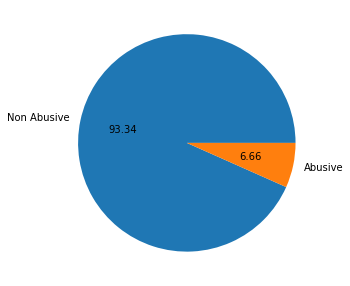

In [15]:
plt.figure(figsize=(12,5))
plt.pie(df.Class.value_counts(),labels=['Non Abusive','Abusive'],autopct='%0.2f')
plt.show()

In [16]:
!pip install nltk

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def text_transformation(txt):
    txt=txt.lower()
    txt=word_tokenize(txt)
    y=[]
    for i in txt:
        if i.isalnum():
            y.append(i)
    txt=y[:]
    y.clear()
    for i in txt:
        if i not in stopwords.words('english'):
            y.append(i)
    txt=y[:]
    y.clear()
    for i in txt:
        y.append(ps.stem(i))
    txt=y[:]
    
    
    
    return " ".join(txt)

In [20]:
 text_transformation('I AM SAMEER #4566 SINGH having living dancing giving')

'sameer 4566 singh live danc give'

In [21]:
df.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


In [22]:
df['charecter']=df['content'].apply(len)
df['sentence_count']= df['content'].apply(lambda x:len(sent_tokenize(x)))
df['num_words'] = df['content'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,content,Class,charecter,sentence_count,num_words
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,1,44
1,fuck you,0,8,1,2
2,Gentlemen:\nThe following champagne is availab...,0,612,6,99
3,sorry i've taken so long...just been trying to...,0,505,8,163
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,2,42


<AxesSubplot:xlabel='charecter', ylabel='Count'>

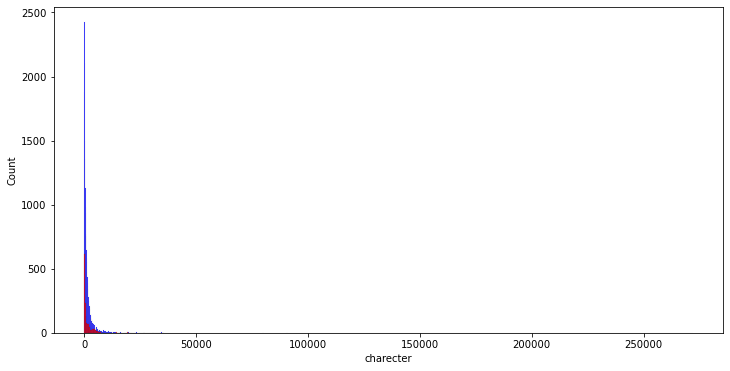

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class']==1]['charecter'],color='blue',label='Abusive')
sns.histplot(df[df['Class']==0]['charecter'],color='red',label='nonAbusive')

<AxesSubplot:xlabel='sentence_count', ylabel='Count'>

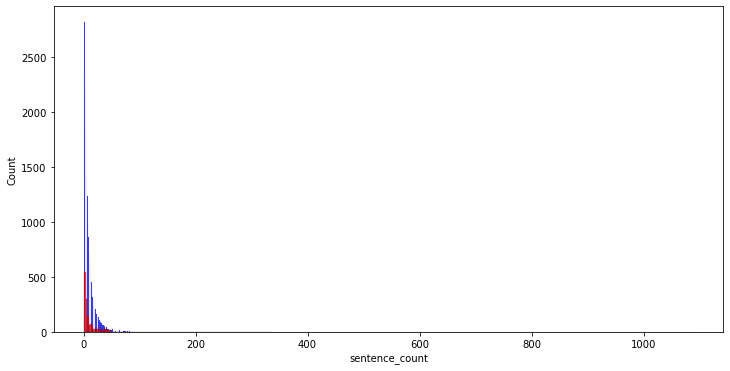

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class']==1]['sentence_count'],color='blue',label='Abusive')
sns.histplot(df[df['Class']==0]['sentence_count'],color='red',label='nonAbusive')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

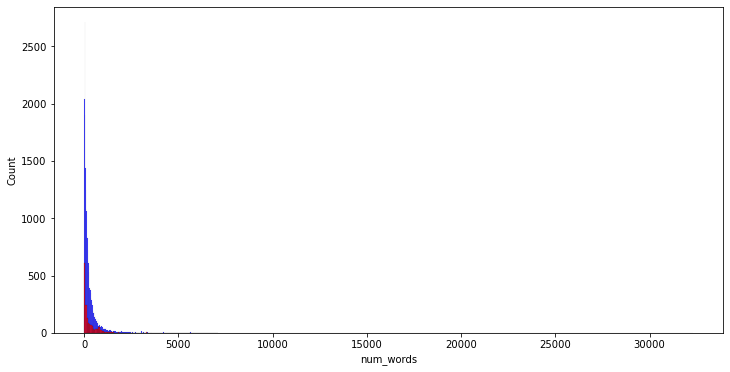

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class']==1]['num_words'],color='blue',label='Abusive')
sns.histplot(df[df['Class']==0]['num_words'],color='red',label='nonAbusive')

# Data Cleaning

In [27]:
df['clean_content']=df['content'].apply(text_transformation)

In [29]:
df.head(50)

,content,Class,charecter,sentence_count,num_words,clean_content
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,1,44,eat shit john j lavorato excelr pm john ect cc...
1,fuck you,0,8,1,2,fuck
2,Gentlemen:\nThe following champagne is availab...,0,612,6,99,gentlemen follow champagn avail 70 approxim re...
3,sorry i've taken so long...just been trying to...,0,505,8,163,sorri taken long tri fend chick life sooooo ha...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,2,42,asshol john j lavorato excelr john ect cc subj...
5,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/24...,0,212,1,41,asshol john j lavorato excelr john ect cc subj...
6,Do you know my hr rep's name?\n\n\n\nJennifer ...,0,146,3,35,know hr rep name jennif burn pm john ect cc su...
14,hey stupid-it is almost yr-end. please do you...,0,211,4,43,hey almost pleas review never go squeez lime c...
15,forgot to send this last week..\nhope you had ...,0,1446,10,305,forgot send last week hope good wknd ca messag...
16,\ngot this from late friday. have you ever hea...,0,535,10,109,got late friday ever heard messag jeff lawson ...


# Vectorization

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=4000)

In [61]:
x=tfidf.fit_transform(df['clean_content']).toarray()

In [62]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
x.shape

(24656, 4000)

In [64]:
y=df['Class']

In [65]:
!pip install wordcloud

In [66]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [67]:
# non Abused word
non_abused_wc=wc.generate(df[df['Class']==1]['clean_content'].str.cat(sep=' '))

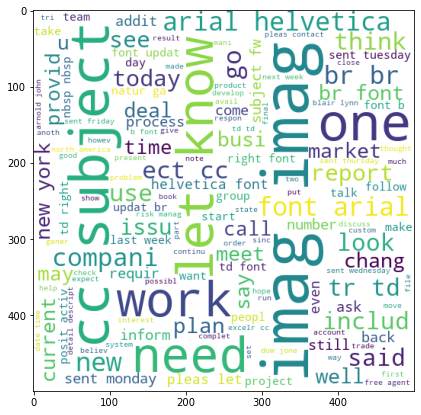

In [68]:
plt.figure(figsize=(12,7))
plt.imshow(non_abused_wc)

In [69]:
# abused wordCloud
abused_wc=wc.generate(df[df['Class']==0]['clean_content'].str.cat(sep=' '))

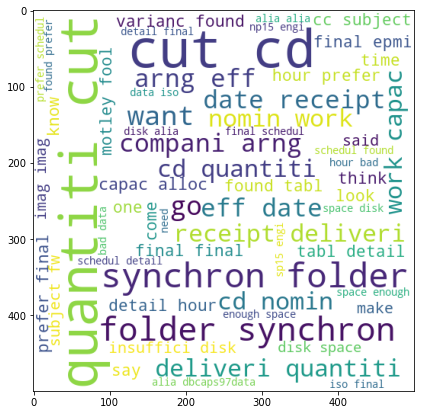

In [70]:
plt.figure(figsize=(12,7))
plt.imshow(abused_wc)

# Model Building

##### spliting data into train and test part

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

In [73]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [74]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnl=BernoulliNB()

In [75]:
gnb.fit(x_train,y_train)

GaussianNB()

In [76]:
y_prdct1=gnb.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
print(accuracy_score(y_test,y_prdct1))

0.8199582155585596


In [78]:
# gaussian precission
print(precision_score(y_test,y_prdct1))

0.9713316892725031


In [79]:
# multinomial naive model
mnb.fit(x_train,y_train)

MultinomialNB()

In [80]:
y_prdct2=mnb.predict(x_test)

In [82]:
# Multinomial Accuracy
print(accuracy_score(y_test,y_prdct2))

0.9550202777436402


In [83]:
# multinomial Precission
print(precision_score(y_test,y_prdct2))

0.962322183775471


In [84]:
bnl.fit(x_train,y_train)
y_prdct3=bnl.predict(x_test)

In [85]:
# bernauli accurcy score
print(accuracy_score(y_test,y_prdct3))

0.8530170824628241


In [86]:
# bernauli precission score
print(precision_score(y_test,y_prdct3))

0.9849612638614613


In [87]:
# data Frame with accuracy and pression score
score=pd.DataFrame({'model':['GaussiaanNB','MultinomialNB','BernauliNB'],'Accuracy':[accuracy_score(y_test,y_prdct1),accuracy_score(y_test,y_prdct2),accuracy_score(y_test,y_prdct3)],'Precission':[precision_score(y_test,y_prdct1),precision_score(y_test,y_prdct2),precision_score(y_test,y_prdct3)]})

In [88]:
score

,model,Accuracy,Precission
0,GaussiaanNB,0.819958,0.971332
1,MultinomialNB,0.955020,0.962322
2,BernauliNB,0.853017,0.984961


# Deployment Part

In [89]:
from pickle import dump

In [90]:
dump(mnb,open("multinomial_model.pkl","wb"))

In [91]:
dump(x,open("transform_x.pkl","wb"))

In [92]:
dump(y,open("y.pkl","wb"))

In [93]:
dump(tfidf,open("tfidf.pkl","wb"))